# LCPB 22-23 exercise 2


### Group 2316:

    Andrea De Vita   2086994
    Enrico Lupi      2090596
    Manfredi Miranda 2086517
    Francesco Zane   2076717

In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
import string
from matplotlib.ticker import NullFormatter
from sklearn.neighbors import NearestNeighbors
from itertools import product
import matplotlib.lines as mlines
plt.rcParams['font.size'] = 14
plt.rcParams["savefig.format"]='png'

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: 
    dname="DATA_b"
    A=4
if CASE==2: 
    dname="DATA_c"
    A=6
    
fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...


In [3]:
np.random.seed(123)

# RBM, nr of hidden units
if CASE==0: 
    M = 3
if CASE==1: 
    M = 3
    G = 5
if CASE==2: 
    M = 2
    
# range of each initial weight
sigma = sqrt(4. / float(L + M))

# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)

print("w=",w)
print("\n")
print("a=",a)
print("\n")
print("b=",b)

w= [[-0.45273926  0.4159218   0.11801019]
 [-0.62816832 -0.24129299  0.68869664]
 [-1.0119952  -0.17886893  0.52793191]
 [-0.36145573 -0.2831151  -0.03949637]
 [ 0.62195247 -0.26644055 -0.18515328]
 [-0.181137    0.91993644  0.91195284]
 [ 0.41871942  0.16105086  0.30750395]
 [ 0.62167823 -0.3902697   0.49035461]
 [-0.52290439 -0.26596076  0.37828902]
 [-0.59580104 -0.05841269 -0.35937663]
 [-0.10660065 -1.16709234 -0.73878037]
 [-0.29186898  0.38677857 -0.07241109]
 [ 0.00118683  0.28700871 -0.36679201]
 [ 0.11828077 -0.33586106 -0.72048798]
 [-0.16301648  0.23929359  0.1412014 ]
 [-0.00493366  0.99768528  0.17219627]
 [ 0.40816113  0.93337029 -0.53967089]
 [-0.43320463  0.72717827 -0.33281517]
 [ 0.01237876  0.44593559  0.37145024]
 [ 0.73183813  0.62372672  0.44596757]]


a= [-0.32224181  0.33148065  0.13106048 -0.55309093  0.59105456  0.33664091
  0.01897068 -0.09720611 -0.49972612  0.08320729  0.19535262 -0.34661559
  0.48467259 -0.4575653  -0.88539405  0.43359617 -0.16821527 -0.0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1]


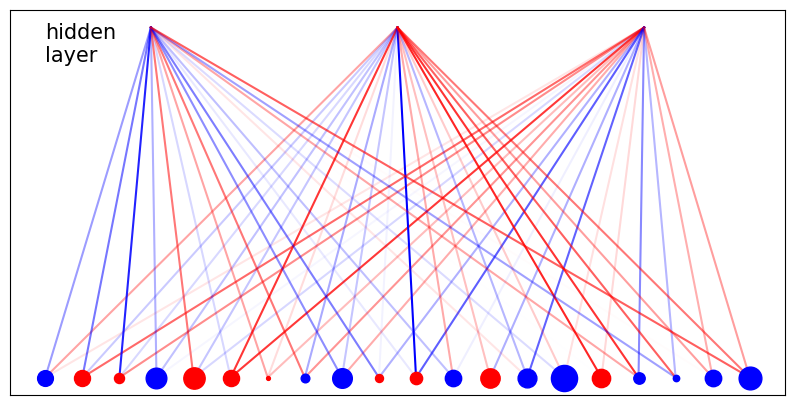

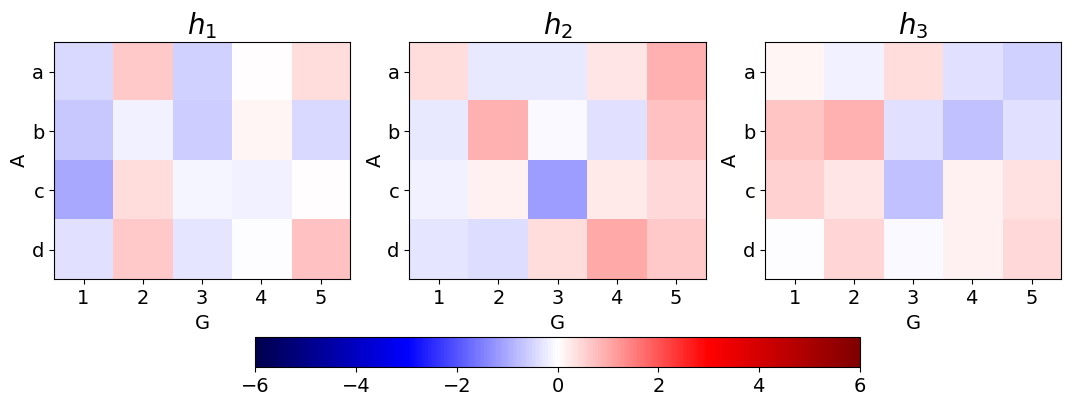

In [5]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph(w,a,b,epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    
    A=400.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    #ax.set_title(f'>0 red, <0 blue',pad=20)
    ax.text(-0.5,0.9,"hidden\nlayer",fontsize=15)
    #plt.savefig(f'finalgraph/weight_s{SPINS}')
    plt.show()
    
def three_plot(w,xdim=13,ydim=5,color='seismic'):
    
    fig, ax = plt.subplots(1,3 , figsize=(xdim, ydim))
    
    for i in range(np.shape(w)[1]):    
        wi = w[:,i].reshape(G,A).T
        img = ax[i].imshow(wi,cmap=color,vmin=-6,vmax=6)
        ax[i].set_title(f'$h_{i+1}$',fontsize=20)
        ax[i].set_ylabel('A',labelpad=2)
        ax[i].set_xlabel('G')
        ax[i].set_yticks(np.arange(A),list(string.ascii_lowercase[0:A]))
        ax[i].set_xticks(np.arange(G),np.arange(G)+1)
    fig.colorbar(img,ax=ax,location='bottom',shrink=.6)
    #plt.savefig(f'finalgraph/three_s{SPINS}')
    plt.show() 
              

plotgraph(w,a,b)
three_plot(w)

In [6]:
#recall act(v) asks for (w,b), while act(h) needs (w.T,a)
def activation(v_in,wei,bias,DE,oneHot=False,centering=False,shift=0):
    if oneHot:
        G = 5  # numbers of block
        A = 4  # numbers of bits per block
        
        # We create a matrix with all the possible blocks (so it's an identity matrix of size A x A)
        v_block = np.eye(A, dtype=int)
        v_block[v_block == 0] = vmin # if vmin=-1 then we set the 0 to -1
        local = v_in @ wei + bias # We calculate the local field (vector of size A*G)
        
        if centering:
            local=(v_in-shift) @ wei + bias
            
        energies = v_block @ (local.reshape(G, A).T)
        Bs = np.exp(DE * energies)
        probs = Bs / np.sum(Bs, axis=0)
        cum_probs = np.cumsum(probs, axis=0)
        num = np.random.rand(G)
        mask = np.argmax(cum_probs > num, axis=0)
        
        return v_block[mask, :].reshape(-1)
        
    else:
        act = v_in@wei + bias
        
        if centering:
            act = (v_in-shift)@wei + bias
            
        prob = 1. / (1. + np.exp(-DE*act))
        v_out = np.full(len(act), vmin, dtype=int)  # a list on -1's or 0's
        v_out[np.random.rand(len(act)) < prob] = 1  # activate the 1's with probability prob
        
        return v_out

In [7]:
#Likelihood implementation
def Likelihood(w,a,b,v_in,perm_v,perm_h,centering=False,mu_d=0,lambd_d=0):
    #Positive phase
    E=np.zeros(N)
    if centering:
        for i in range(N):
            h=activation(v_in[i],w,b,GAP)
            E[i]=-(np.dot(a,(v_in[i]-mu_d))+np.dot(b,(h-lambd_d))+np.dot((h-lambd_d),np.dot((v_in[i]-mu_d),w)))
    else:
        for i in range(N):
            h=activation(v_in[i],w,b,GAP)
            E[i]=-(np.dot(a,v_in[i])+np.dot(b,h)+np.dot(h,np.dot(v_in[i],w)))
    
    E_z=np.array([])
    if centering:
        for V in perm_v:
            for H in perm_h:
                e=-(np.dot(a,(V-mu_d))+np.dot(b,(H-lambd_d))+np.dot((H-lambd_d),np.dot((V-mu_d),w)))       
                E_z=np.append(E_z,e)
    else:
        for V in perm_v:
            for H in perm_h:
                e=-(np.dot(a,V)+np.dot(b,H)+np.dot(H,np.dot(V,w)))       
                E_z=np.append(E_z,e)
    Z=np.sum(np.exp(-E_z))
    log_z=np.log(Z)
    Like=-(np.mean(E)+log_z)
    
    return Like

#create all the possibile v and h
possible_states = [[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]
possible_h=[0,1]

V_z = []
H_z = []
for i in product(possible_states,repeat=G):
    V_z = np.append(V_z,i)
for i in product(possible_h,repeat=M):
    H_z = np.append(H_z,i)
            
V_z=V_z.reshape(A**G,L)
H_z=H_z.reshape(2**M,M)

if SPINS:
    V_z=2*V_z-1
    H_z=2*H_z-1

In [8]:
#Manhattan distance
def ManDist(x, y):
    return np.sum(x != y)

#Adversarial Accuracy Indicator
def AAI(T, S, info=False):
    Ns = len(T)
    nbrsT = NearestNeighbors(n_neighbors=1, algorithm='auto', metric=ManDist).fit(T)
    nbrsS = NearestNeighbors(n_neighbors=1, algorithm='auto', metric=ManDist).fit(S)
    #find the closest points of the function argument to the points of nbrsX training set 
    dTS, indexTS = nbrsS.kneighbors(T)
    dST, indexST = nbrsT.kneighbors(S)
    #find the closest points of nbrsX training set to itself
    dTT, indexTT = nbrsT.kneighbors()
    dSS, indexSS = nbrsS.kneighbors()
   
    if info:
        print("TS:")
        for i in range(Ns):
            print(dTS[i], indexTS[i])
        print("TT:")
        for i in range(Ns):
            print(dTT[i], indexTT[i])
        print("ST:")
        for i in range(Ns):
            print(dST[i], indexST[i])
        print("SS:")
        for i in range(Ns):
            print(dSS[i], indexSS[i])
   
    As = 0
    At = 0
    for m in range(Ns):
        if dSS[m,0] < dST[m,0]:
            As += 1
        elif dSS[m,0] == dST[m,0]:
            As += 0.5 
        if dTT[m,0] < dTS[m,0]:
            At += 1
        elif dTT[m,0] == dTS[m,0]:
            At += 0.5
    
    As /= Ns
    At /= Ns
    epsAA = (As - 0.5)**2 + (At - 0.5)**2
    return epsAA, As, At

In [9]:
#ADAM optimizator
def ADAM(data, model, m, s, t, l_rate=0.1, beta1=0.99, beta2=0.99, eps=1e-8):
    g = data - model
    m0 = beta1*m + (1-beta1)*g
    s0 = beta2*s + (1-beta2)*g**2
    m_hat = m0/(1-beta1**t)
    s_hat = s0/(1-beta2**t)
    d = l_rate*m_hat/np.sqrt(s_hat+eps)
    
    return m0, s0, d

#ADAM coefficients
beta1, beta2 = 0.99, 0.99

In [10]:
# function to train the model given startin weights and biases:
# nepoch is the number of epochs t train for, mini is the size of the minibatch, 
# OHE, adam and centering control whether to use their namesakes or not,
# draw is to plot the graph, Like and aai are to calculate the log-likelihood and Adversarial Accuracy 
# Indicator, epochs in which epochs to do the previous operations, and finally Ns the size of 
# the set on which to calculte AAI

def BoltzmannTrain(w, a, b, nepoch=100, mini=500, l_rate=1.0, CD=1, 
                   OHE=True, adam=False, centering=False,
                   epochs=[], draw=False, Like=False, aai=False, Ns=250):
    
    #initialize centering trick parameters
    mu=0
    lambd=0
    csi=0.01

    epsAA = np.array([])
    LHd   = np.array([])
    LHrbm = np.array([])
    
    #initialise adam variables
    mw, sw = np.zeros(shape=(L,M)), np.zeros(shape=(L,M))
    ma, sa = np.zeros(L), np.zeros(L)
    mb, sb = np.zeros(M), np.zeros(M)
    t=1

    #calculate starting values of evaluators
    if aai or Like:
        #create fantasy dataset for following analysis
        v_fantasy = np.zeros(shape=(N,L))
        for kprime in range(N):
            vf = np.copy(v[kprime])
            #loop for CD-n (update hf and vf)
            for r in range(CD):
                hf = activation(vf,w,  b,GAP)
                vf = activation(hf,w.T,a,GAP,OHE)
            v_fantasy[kprime] = np.copy(vf)
                    
        """Adversarial Accuracy Indicator"""
        if aai:
            Adv = AAI(v_fantasy[:Ns,:], v[:Ns,:])
            epsAA = np.append(epsAA, Adv[0])
            print("Starting values:")
            print("epsAAI:", Adv[0])
    
        '''Likelihood implementation'''
        if Like: 
            l_d   = Likelihood(w,a,b,v,V_z,H_z,centering=centering,mu_d=mu,lambd_d=lambd)
            l_rbm = Likelihood(w,a,b,v_fantasy,V_z,H_z,centering=centering,mu_d=mu,lambd_d=lambd)
            LHd   = np.append(LHd,   l_d)
            LHrbm = np.append(LHrbm, l_rbm)
            print("Starting values:")
            print("Log Likelihoods:", l_d, l_rbm)
                 
    m=0
    #Start Training    
    for epoch in range(nepoch):
        for k in range(N):
            if m==0:
                # initialize averages in miniblock
                v_data, v_model = np.zeros(L),np.zeros(L)
                h_data, h_model = np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
                
                v_d=np.array([])
                v_m=np.array([])
                h_d=np.array([])
                h_m=np.array([])
                vh_d=np.array([])
                vh_m=np.array([])

    
            # positive CD phase: generating h 
            h = activation(v[k],w,b,GAP,centering=centering,shift=mu)
    
            '''Contrastive Divergence (CD-n)'''
            #inizialize hf and vf
            hf = np.copy(h)
            vf = np.copy(v[k])
            #loop per CD-n (update hf and vf)
            for r in range(CD):
                # negative CD phase: generating fantasy vf
                vf = activation(hf,w.T,a,GAP,True,centering=centering,shift=lambd)
                # one more positive CD phase: generating fantasy h from fantasy vf 
                hf = activation(vf,w,b,GAP,centering=centering,shift=mu)

            v_data  += v[k]
            v_model += vf
            h_data  += h
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)
        
            #useful for the centering trick
            v_d=np.append(v_d,v[k])
            h_d=np.append(h_d,h)
            v_m=np.append(v_m,vf)
            h_m=np.append(h_m,hf)
        
    
            m += 1
        
            '''Optimizator implementation'''
            # minibatch
            if m==mini:
                if centering:
                    #reshape
                    v_d=v_d.reshape(mini,L)
                    h_d=h_d.reshape(mini,M)
                    v_m=v_m.reshape(mini,L)
                    h_m=h_m.reshape(mini,M)
                
                
                    #update mu and lambda
                    mu_batch    =np.mean(v_d,axis=0)
                    lambda_batch=np.mean(h_d,axis=0)
            
                    mu=(1-csi)*mu+csi*mu_batch
                    lambd=(1-csi)*lambd+csi*lambda_batch
                
                    #shifting of the variables
                    v_d=v_d-mu
                    h_d=h_d-lambd
                    v_m=v_m-mu
                    h_m=h_m-lambd
                
                    for i in range(mini):
                        vh_d=np.append(vh_d,np.outer(v_d[i].T,h_d[i]))
                        vh_m=np.append(vh_m,np.outer(v_m[i].T,h_m[i]))
                
                    vh_d=vh_d.reshape(mini,L,M)
                    vh_m=vh_m.reshape(mini,L,M)
                
                    #centered parameters
                    v_data  = np.sum(v_d,axis=0)
                    v_model = np.sum(v_m,axis=0)
                    h_data  = np.sum(h_d,axis=0)
                    h_model = np.sum(h_m,axis=0)
                    vh_data = np.sum(vh_d,axis=0)
                    vh_model= np.sum(vh_m,axis=0)
                    
                dw, da, db = 0,0,0
                if adam:
                    # gradient of the likelihood: follow it along its positive direction
                    # with ADAM optimizator
                    mw, sw, dw = ADAM(vh_data, vh_model, mw, sw, t, l_rate, beta1, beta2)
                    ma, sa, da = ADAM( v_data,  v_model, ma, sa, t, l_rate, beta1, beta2)
                    mb, sb, db = ADAM( h_data,  h_model, mb, sb, t, l_rate, beta1, beta2)
                    t+=1
                    
                else:  
                    # aggregate normalization of batch statistics and learning rate
                    l_rate_m = l_rate / mini
                    # "vanilla" SGD
                    dw = l_rate_m*(vh_data - vh_model)
                    da = l_rate_m*(v_data - v_model)
                    db = l_rate_m*(h_data - h_model)
                
                # gradient ascent for maximisation
                w = w + dw
                a = a + da
                b = b + db
                m=0
                
        if epoch%10==9:
            print("Current epoch:", epoch+1)
        
        if (epoch+1) in epochs:
            
            """Print Graph"""
            if draw:
                if epoch%10==9:
                    plotgraph(w,a,b,epoch+1)
                    three_plot(w)
                    print('l_rate = ',l_rate)
                    print("\n")
            
            if aai or Like:
                #compute fantasy dataset for following analysis
                for kprime in range(N):
                    vf = np.copy(v[kprime])
                    #loop for CD-n (update hf and vf)
                    for r in range(CD):
                        hf = activation(vf,w,  b,GAP)
                        vf = activation(hf,w.T,a,GAP,OHE)
                    v_fantasy[kprime] = np.copy(vf)
                    
                """Adversarial Accuracy Indicator"""
                if aai:
                    Adv = AAI(v_fantasy[:Ns,:], v[:Ns,:])
                    epsAA = np.append(epsAA, Adv[0])
                    print("Current epoch:", epoch+1)
                    print("epsAAI:", Adv[0])
    
                '''Likelihood implementation'''
                if Like: #if Like is zero we are not interested in calculating likelihood
                    l_d   = Likelihood(w,a,b,v,V_z,H_z,centering=centering,mu_d=mu,lambd_d=lambd)
                    l_rbm = Likelihood(w,a,b,v_fantasy,V_z,H_z,centering=centering,mu_d=mu,lambd_d=lambd)
                    LHd   = np.append(LHd,   l_d)
                    LHrbm = np.append(LHrbm, l_rbm)
                    print("Current epoch:", epoch+1)
                    print("Log Likelihoods:", l_d, l_rbm)
    
        # randomize the order of input data
        np.random.shuffle(v)
        # decrease the learning rate (here as a power law)
        if not adam:
            l_rate = l_rate / (0.01 * l_rate + 1)
            
    return epsAA, LHd, LHrbm

Starting values:
epsAAI: 0.15367999999999996
Starting values:
Log Likelihoods: -9.467793025217018 -8.027107992315257
Current epoch: 10


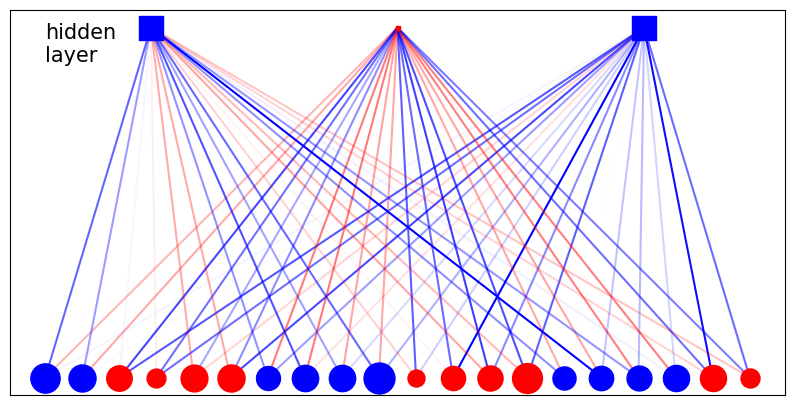

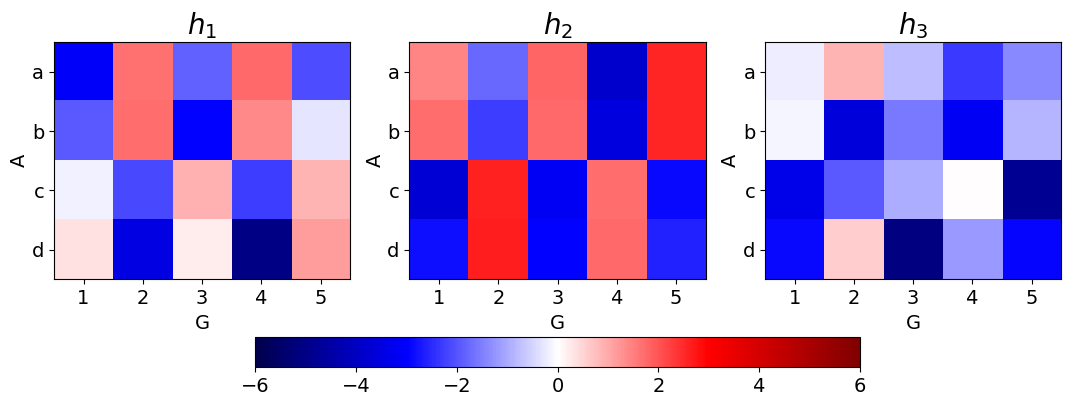

l_rate =  0.1


Current epoch: 10
epsAAI: 0.0012680000000000022
Current epoch: 10
Log Likelihoods: -5.550534528876119 -5.507228517807823
Current epoch: 20


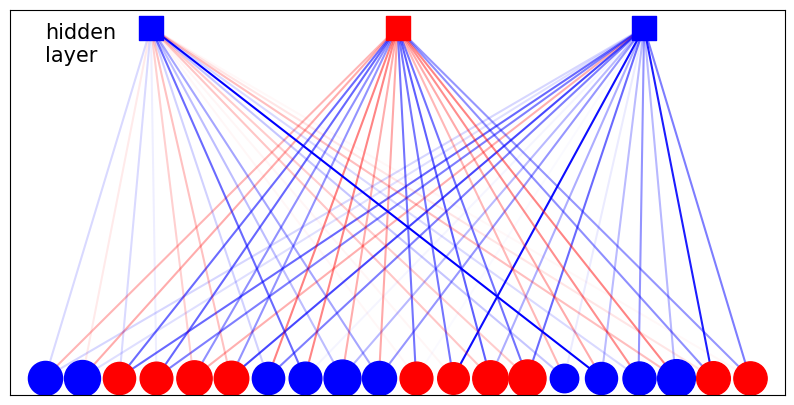

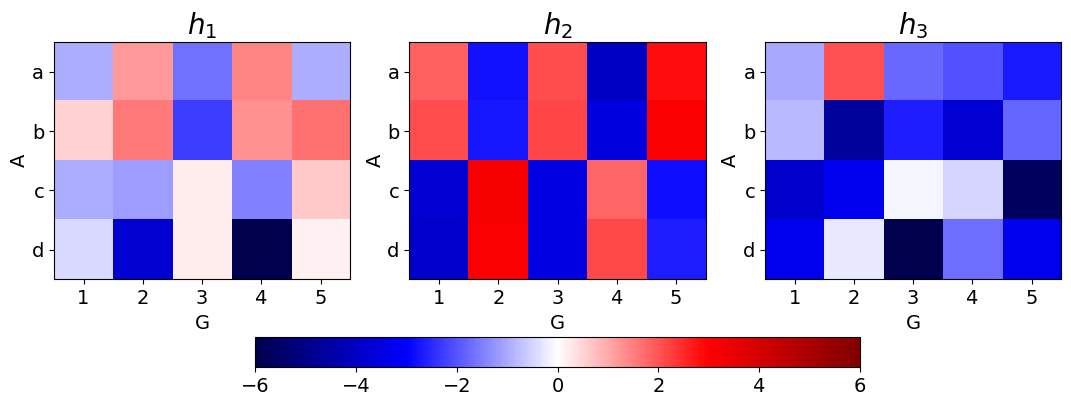

l_rate =  0.1


Current epoch: 20
epsAAI: 0.00010400000000000018
Current epoch: 20
Log Likelihoods: -5.344988545739377 -5.355276226704817
Current epoch: 30


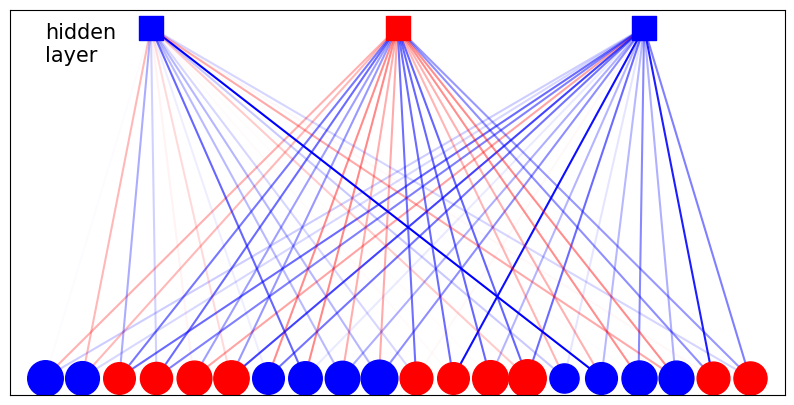

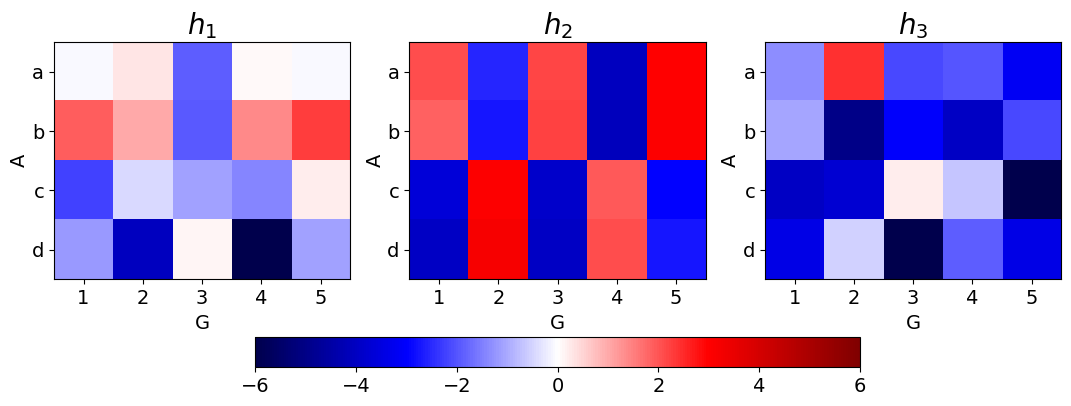

l_rate =  0.1


Current epoch: 30
epsAAI: 0.00012800000000000024
Current epoch: 30
Log Likelihoods: -5.173907153699493 -5.163136411630833
Current epoch: 40


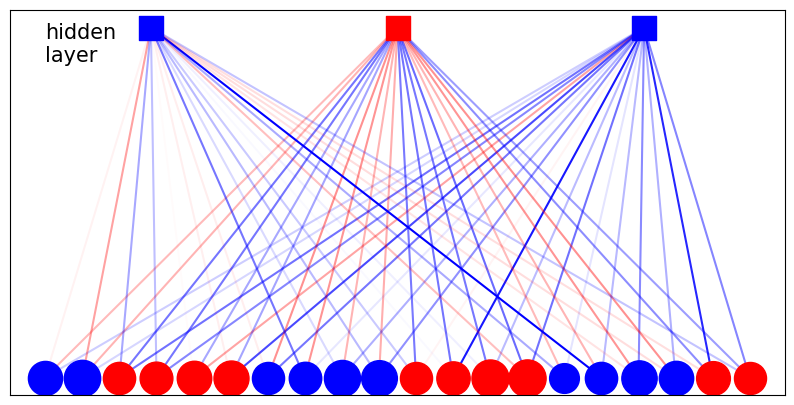

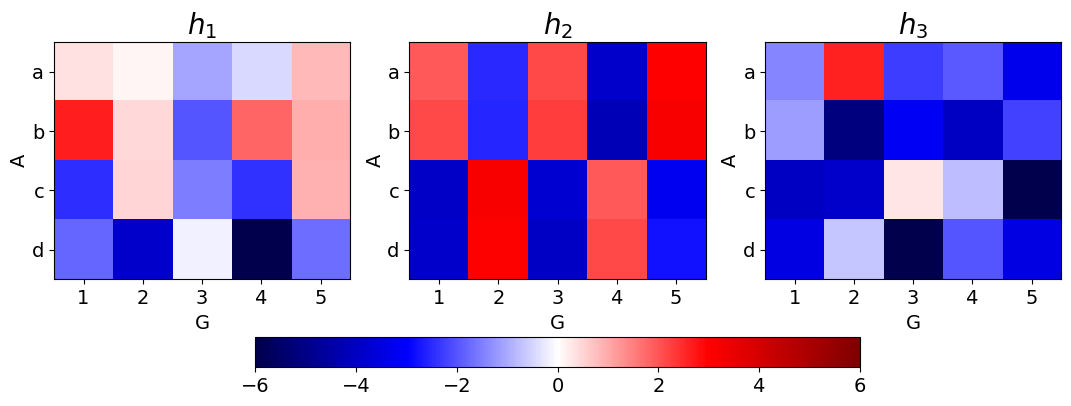

l_rate =  0.1


Current epoch: 40
epsAAI: 0.00014800000000000026
Current epoch: 40
Log Likelihoods: -5.188433695831249 -5.170932377149525
Current epoch: 50


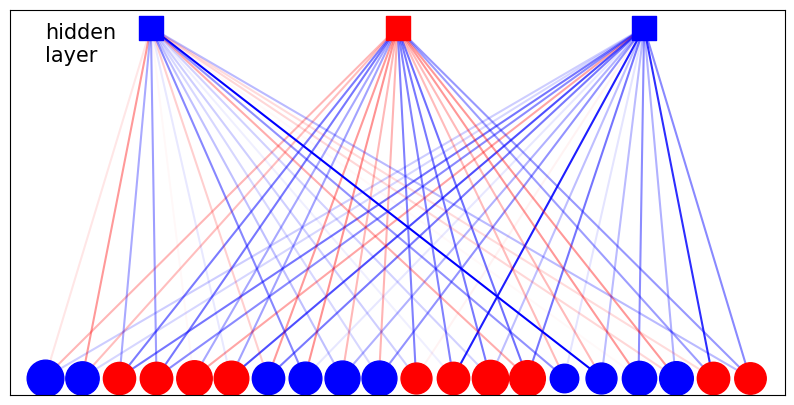

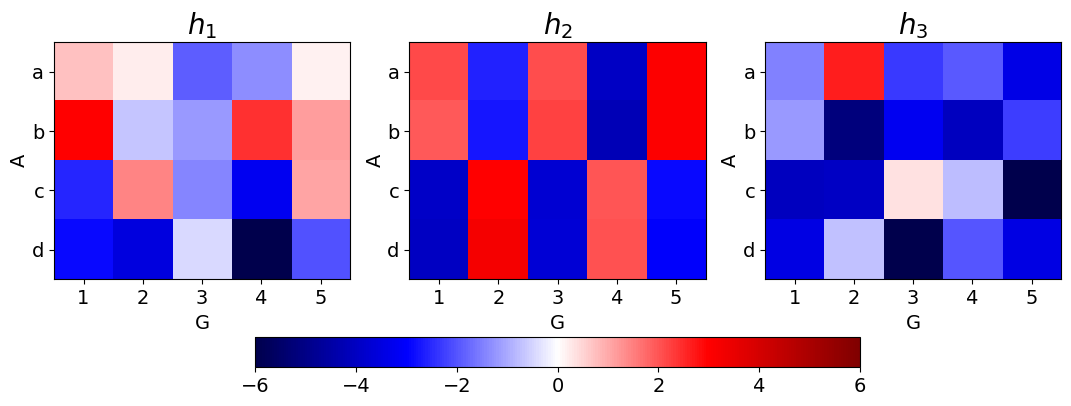

l_rate =  0.1


Current epoch: 50
epsAAI: 5.200000000000009e-05
Current epoch: 50
Log Likelihoods: -5.178976430554399 -5.158893308650991


In [11]:
nepoch = 50
epochs = [10,20,30,40,50]
mini=500
l_rate=0.1

eAAI, LL_d, LL_rbm = BoltzmannTrain(w, a, b, nepoch=nepoch, mini=mini, l_rate=l_rate, CD=1,
                                    OHE=True, adam=True, centering=False,
                                    epochs=epochs, draw=True, Like=True, aai=True, Ns=250)


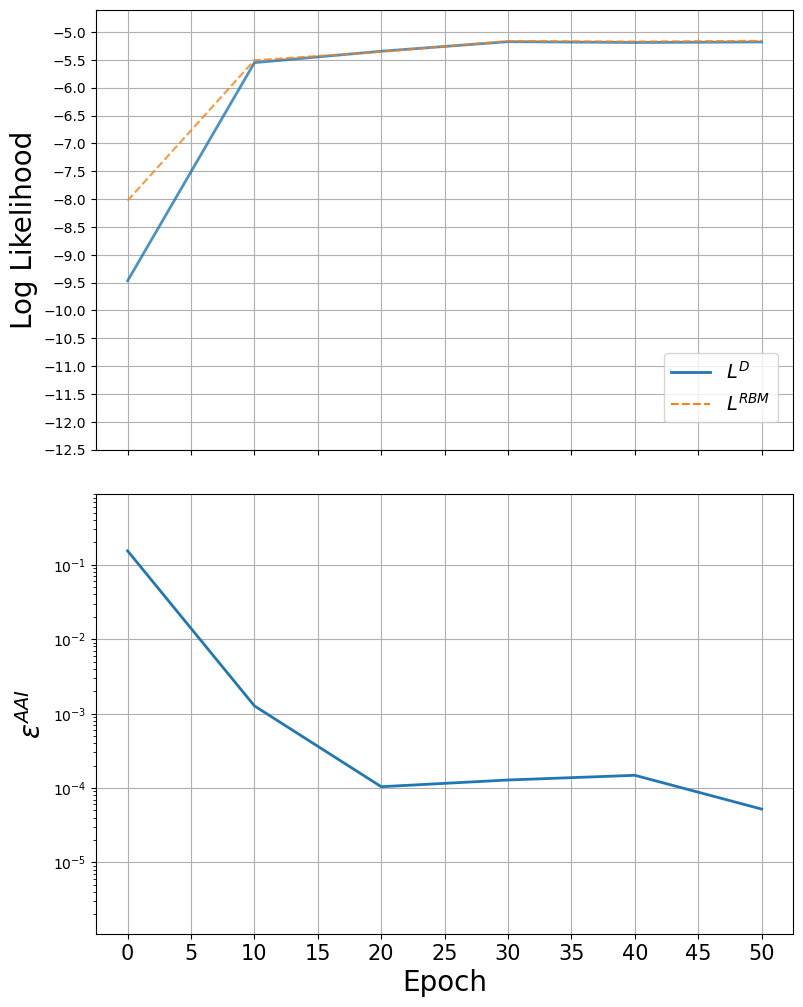

In [12]:
epochs = [0,10,20,30,40,50]

fig, ax = plt.subplots(nrows=2, ncols=1, sharey=False, sharex=True, figsize=(9, 12))

ax[0].plot(epochs, LL_d,   ls="-",  lw=2,   color="C0", markersize=6, alpha=0.8)
ax[0].plot(epochs, LL_rbm, ls="--", lw=1.5, color="C1", markersize=7, alpha=0.8)
ax[1].plot(epochs, eAAI,   ls="-",  lw=2,   color="C0", markersize=6)

ax[0].grid()
ax[1].grid()
ax[0].set_yticks(np.arange(-12.5, -3.5,0.5))
ax[1].set_xticks(np.arange(0, 55,5))
ax[0].set_ylim([-12.5,-4.6])
ax[1].set_ylim([1.1e-6,0.9])
ax[1].set_yscale("log")


ax[0].set_ylabel('Log Likelihood',      fontsize=20)
ax[1].set_ylabel('$\epsilon^{AAI}$', fontsize=20)

ax[0].tick_params(labelsize=10)
ax[1].tick_params(axis="y",labelsize=10)
ax[1].tick_params(axis="x",labelsize=15)

plt.subplots_adjust(wspace=0, hspace=0.1)

ax[1].set_xlabel('Epoch', fontsize=20)

straight_line = mlines.Line2D([], [], color='C0', ls="-",  lw=2,  label='$L^D$')
dashed_line   = mlines.Line2D([], [], color='C1', ls="--", lw=1.5,label='$L^{RBM}$')

# Create a legend for the first line.
first_legend = ax[1].legend(handles=[straight_line, dashed_line], bbox_to_anchor=(0.80, 1.14), loc='lower left')


plt.show()
